In [1]:
# Imports / style (run this first always)

%matplotlib inline
from collections import defaultdict
import json
import sys

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

class AwesomeError(Exception):
     def __init__(self, value):
         self.value = value
         pass
     def __str__(self):
         return repr(self.value)
         pass

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

import Bio as bp
from Bio.Sequencing.Applications import BwaAlignCommandline as bwa_aln
from Bio.Sequencing.Applications import BwaSamseCommandline as bwa_samse
from Bio.Sequencing.Applications import BwaSampeCommandline as bwa_sampe
from Bio.Sequencing.Applications import BwaIndexCommandline as bwa_index
from Bio.Sequencing.Applications import BwaBwaswCommandline as bwa_bwasw
import HTSeq as ht

In [2]:
vcfr = ht.VCF_Reader("/hpc/users/neffr01/jason_new/hapcut_outputs/hg002_000000F/hg002_short_read_freebayes.000000F.vcf_snps.vcf")
vcfr.parse_meta()
vcfr.make_info_dict()
all_gc = []

In [6]:
variant_positions = []
lastpos = 0
for v in vcfr:
    variant_positions.append((v.pos.pos, v.pos.pos - lastpos))
    lastpos = v.pos.pos

In [7]:
snp_dist = [x[1] for x in variant_positions]

In [10]:
def n50(arr):
    calcarr = [list(np.ones(x).astype(int)*x) for x in arr]
    calcarr = [item for sublist in calcarr for item in sublist]
    return np.median(calcarr)

In [11]:
n50(snp_dist)

3943.0

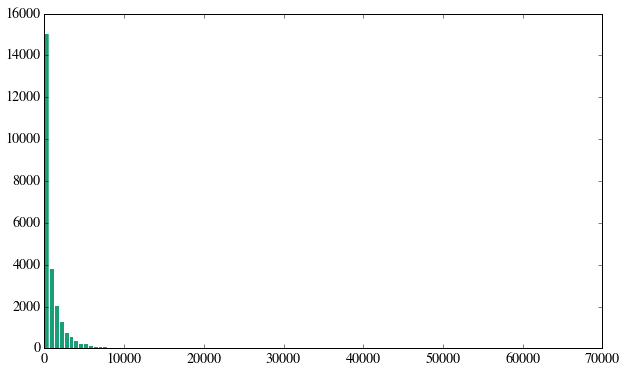

In [14]:
plt.hist(snp_dist, bins=100)
plt.show()